# Machine Learning

In this part we will assess ML model

# Modeling with Extracted Features from EDA(Validation Process)

- Linear Regression
- Random Forest

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data = pd.read_csv('../dataset/extracted/feature_extracted.csv')
# data=pd.read_csv('../dataset/processed/cleanedData.csv')
data.head(2)

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,...,HasTopCrew,NumStudios,StudioRank,NumTopStudios,HasTopStudio,isUnitedStates,CountryRank,IsEnglish,keywordRank,cerRank
0,Jumanji: Welcome to the Jungle,2283362,90000000,"['Dwayne Johnson', 'Karen Gillan', 'Kevin Hart...","['Scott Rosenberg', 'Erik Sommers', 'Chris McK...","['Columbia Pictures', 'Matt Tolmach Production...","['Action', 'Adventure', 'Comedy']","['jungle', 'adventurer', 'trapped in a game', ...",['English'],['United States'],...,1,3,1013,0,0,1,9,1,164.0,5
1,Transformers: Revenge of the Fallen,1055369,200000000,"['Shia LaBeouf', 'Megan Fox', 'Josh Duhamel', ...","['Ehren Kruger', 'Michael Bay', 'Roberto Orci'...","['Dreamworks Pictures', 'Paramount Pictures', ...","['Action', 'Adventure', 'Sci-Fi']","['optimus prime character', 'megatron characte...","['English', 'Spanish']",['United States'],...,1,3,1036,1,0,1,9,1,67.0,5


Drop **str** column

In [27]:
for index in data.columns:
    if type(data[index][0]) == str:
        data = data.drop(index, axis=1)
# Drop Movie_ID, Rating, Rating_Count
data.drop(['Movie_ID', 'Rating', 'Rating_Count', 'Release_Day', 'Release_Month'], axis=1, inplace=True)
data.head(2)

,Budget,Runtime,Gross_worldwide,Release_Year,GenreRank,IsAdventure,SpecialMonth,CastsRank,NumLeadActors,HasTop50Actors,...,HasTopCrew,NumStudios,StudioRank,NumTopStudios,HasTopStudio,isUnitedStates,CountryRank,IsEnglish,keywordRank,cerRank
0,90000000,119.0,995339117,2017,18.0,1,1,39476,1,1,...,1,3,1013,0,0,1,9,1,164.0,5
1,200000000,149.0,836303693,2009,20.0,1,1,57482,2,0,...,1,3,1036,1,0,1,9,1,67.0,5


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Budget           8737 non-null   int64  
 1   Runtime          8737 non-null   float64
 2   Gross_worldwide  8737 non-null   int64  
 3   Release_Year     8737 non-null   int64  
 4   GenreRank        8737 non-null   float64
 5   IsAdventure      8737 non-null   int64  
 6   SpecialMonth     8737 non-null   int64  
 7   CastsRank        8737 non-null   int64  
 8   NumLeadActors    8737 non-null   int64  
 9   HasTop50Actors   8737 non-null   int64  
 10  NumCrews         8737 non-null   int64  
 11  crewsTeamRank    8737 non-null   int64  
 12  NumTopCrew       8737 non-null   int64  
 13  HasTopCrew       8737 non-null   int64  
 14  NumStudios       8737 non-null   int64  
 15  StudioRank       8737 non-null   int64  
 16  NumTopStudios    8737 non-null   int64  
 17  HasTopStudio  

Correlation Plot

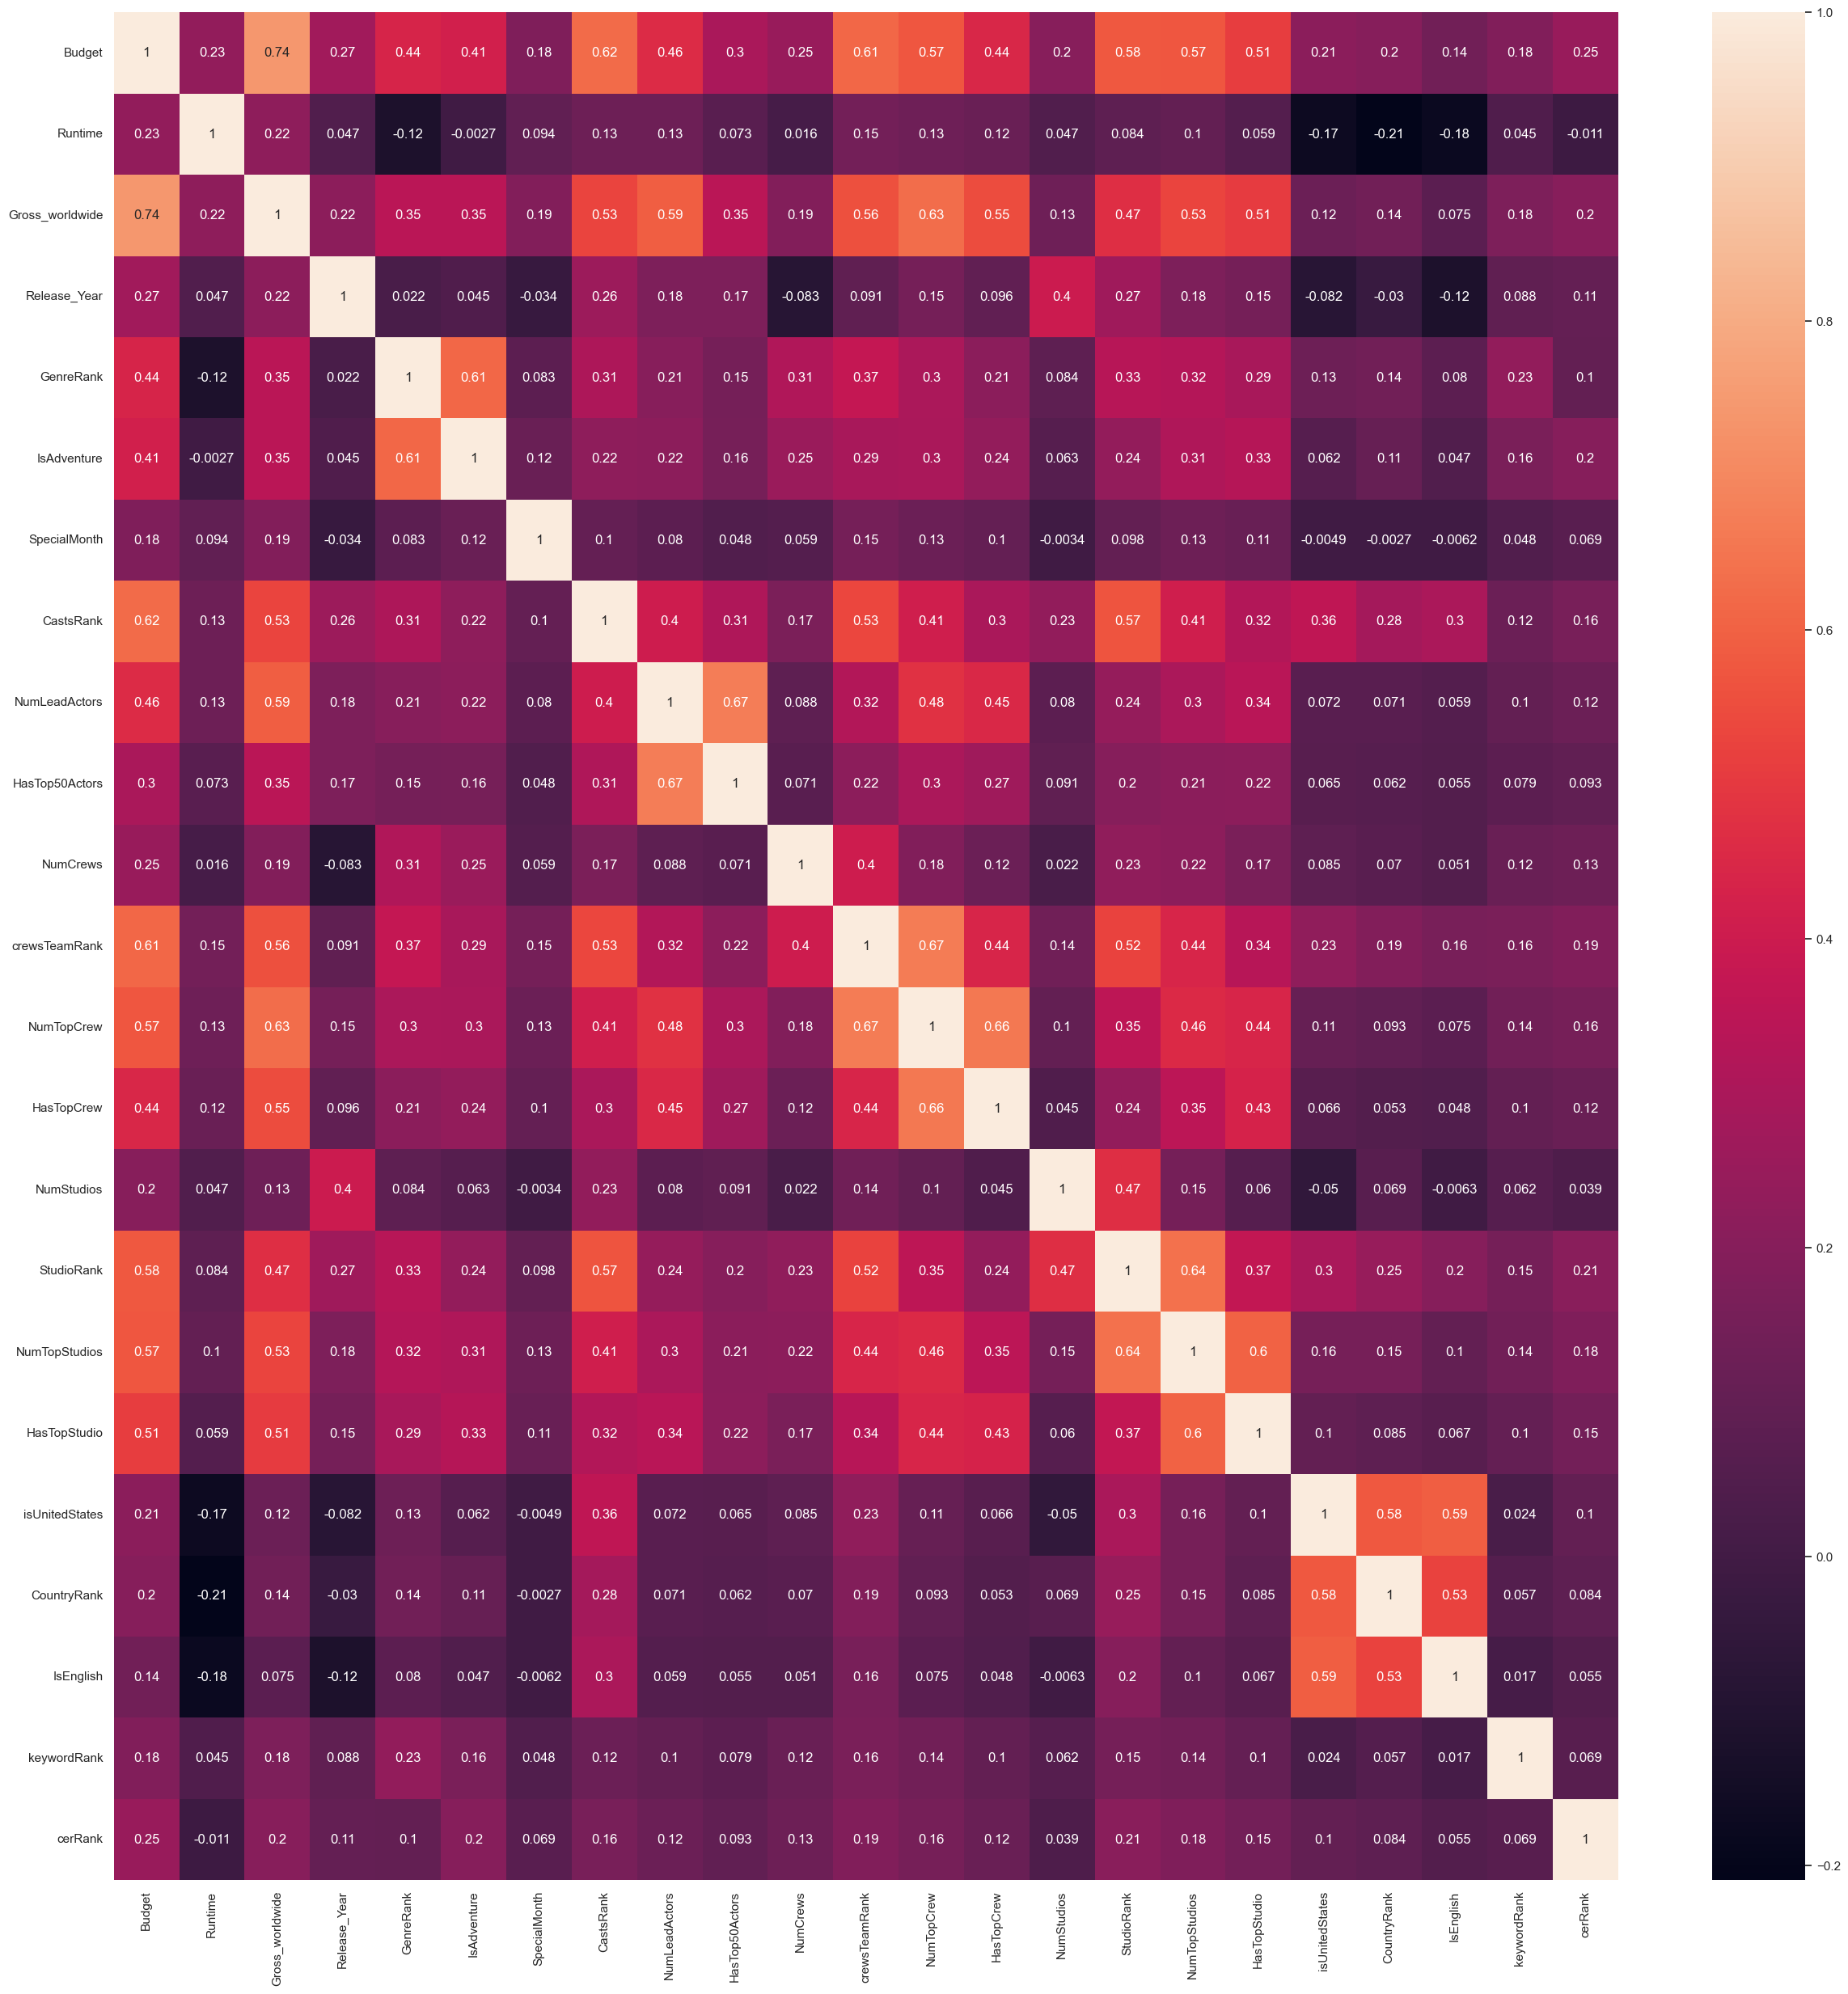

In [29]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True)
plt.show()

Top correlation with **Gross_worldwide**

In [30]:
data.corr()['Gross_worldwide'].sort_values(ascending=False)

Gross_worldwide    1.000000
Budget             0.743698
NumTopCrew         0.630046
NumLeadActors      0.593582
crewsTeamRank      0.559045
HasTopCrew         0.550443
CastsRank          0.529044
NumTopStudios      0.528944
HasTopStudio       0.505346
StudioRank         0.469454
IsAdventure        0.347793
GenreRank          0.346080
HasTop50Actors     0.345311
Runtime            0.223180
Release_Year       0.217503
cerRank            0.204351
SpecialMonth       0.187481
NumCrews           0.187430
keywordRank        0.176373
CountryRank        0.141477
NumStudios         0.133120
isUnitedStates     0.124122
IsEnglish          0.074598
Name: Gross_worldwide, dtype: float64

In [31]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [32]:
data.columns

Index(['Budget', 'Runtime', 'Gross_worldwide', 'Release_Year', 'GenreRank',
       'IsAdventure', 'SpecialMonth', 'CastsRank', 'NumLeadActors',
       'HasTop50Actors', 'NumCrews', 'crewsTeamRank', 'NumTopCrew',
       'HasTopCrew', 'NumStudios', 'StudioRank', 'NumTopStudios',
       'HasTopStudio', 'isUnitedStates', 'CountryRank', 'IsEnglish',
       'keywordRank', 'cerRank'],
      dtype='object')

## Linear Regression

- With out feature engineering

In [33]:
testScore = 0
trainScore = 0
mae_val = 0
mae_train = 0
loop = 1000
for i in range(loop):
    lin = linear_model.LinearRegression()
    train, test = train_test_split(data, test_size=0.3)
    target = ['Gross_worldwide']
    feature = ['Budget', 'Runtime', 'Release_Year']
    x_train = train[feature]
    y_train = train[target]
    x_test = test[feature]
    y_test = test[target]
    lin.fit(x_train, y_train)
    y_predicted = lin.predict(x_test)
    testScore += lin.score(x_test, y_test)
    trainScore += lin.score(x_train, y_train)
    mae_train += mean_absolute_error(y_train, lin.predict(x_train))
    mae_val += mean_absolute_error(y_test, y_predicted)
else:
    testScore /= loop
    trainScore /= loop
    mae_val /= loop
    mae_train /= loop
print("Average train score: %.2f" % trainScore)
print("Average test score: %.2f" % testScore)

print("MAE Train: ", mae_train)
print("MAE Test: ", mae_val)

Average train score: 0.56
Average test score: 0.55
MAE Train:  53254618.74913921
MAE Test:  53371757.75007152


Mean MAE of test set with 1000 loops is 53M$ ~ 1262 Tỷ VND

- With feature engineering

In [34]:
testScore = 0
trainScore = 0
mae_val = 0
mae_train = 0
loop = 100
for i in range(loop):
    lin = linear_model.LinearRegression()
    train, test = train_test_split(data, test_size=0.3)
    target = ['Gross_worldwide']
    x_train = train.drop('Gross_worldwide', axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide', axis=1)
    y_test = test[target]
    lin.fit(x_train, y_train)
    y_predicted = lin.predict(x_test)
    testScore += lin.score(x_test, y_test)
    trainScore += lin.score(x_train, y_train)
    mae_train += mean_absolute_error(y_train, lin.predict(x_train))
    mae_val += mean_absolute_error(y_test, y_predicted)
else:
    testScore /= loop
    trainScore /= loop
    mae_val /= loop
    mae_train /= loop
print("Average train score: %.2f" % trainScore)
print("Average test score: %.2f" % testScore)

print("MAE Train: ", mae_train)
print("MAE Test: ", mae_val)

Average train score: 0.70
Average test score: 0.69
MAE Train:  47198223.98646296
MAE Test:  47906597.846762106


Mean MAE of test set with 1000 loops is 47M$ ~ 1119 Tỷ VND

## Random Forest

- With feature engineering

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

lin = RandomForestRegressor(n_estimators=1000)
train, test = train_test_split(data, test_size=0.3)
target = ['Gross_worldwide']
x_train = train.drop('Gross_worldwide', axis=1)
y_train = train[target]
x_test = test.drop('Gross_worldwide', axis=1)
y_test = test[target]
lin.fit(x_train, y_train)
y_predicted = lin.predict(x_test)
testScore = lin.score(x_test, y_test)
trainScore = lin.score(x_train, y_train)
mae_val = mean_absolute_error(y_test, y_predicted)
mae_val_train = mean_absolute_error(y_train, lin.predict(x_train))
print("Average train score: %.2f" % trainScore)
print("Average test score: %.2f" % testScore)
print("MAE train: ", mae_val_train)
print("MAE test: ", mae_val)


Average train score: 0.96
Average test score: 0.72
MAE train:  14728575.91577776
MAE test:  42129126.18339855


Mean MAE of test 42M$ ~ 1000 Tỷ Vietnam Dong

# Modeling with Extracted Features in Training

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data = pd.read_csv('../dataset/processed/cleaned_data.csv')
data.head(2)

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,Release_Data,Runtime,Gross_worldwide,Rating,Rating_Count,ListOfCertificate,Release_Year,Release_Month,Release_Day
0,Jumanji: Welcome to the Jungle,2283362,90000000,"['Dwayne Johnson', 'Karen Gillan', 'Kevin Hart...","['Scott Rosenberg', 'Erik Sommers', 'Chris McK...","['Columbia Pictures', 'Matt Tolmach Production...","['Action', 'Adventure', 'Comedy']","['jungle', 'adventurer', 'trapped in a game', ...",['English'],['United States'],2017-12-20,119.0,995339117,6.9,389000,['PG-13'],2017,12,20
1,Transformers: Revenge of the Fallen,1055369,200000000,"['Shia LaBeouf', 'Megan Fox', 'Josh Duhamel', ...","['Ehren Kruger', 'Michael Bay', 'Roberto Orci'...","['Dreamworks Pictures', 'Paramount Pictures', ...","['Action', 'Adventure', 'Sci-Fi']","['optimus prime character', 'megatron characte...","['English', 'Spanish']",['United States'],2009-06-24,149.0,836303693,5.9,412000,['PG-13'],2009,6,24


## Initialization

In [39]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from FeatureExtractor import BORFeatureExtractor
from sklearn.preprocessing import MinMaxScaler

In [40]:
import ast

cols = ['Cast', 'Genre', 'Studios', 'ListOfCertificate', 'Keywords', 'Languages', 'Countries', 'Crew']
for col in cols:
    data[col] = data[col].apply(ast.literal_eval)

In [41]:
data.columns

Index(['Movie_Title', 'Movie_ID', 'Budget', 'Cast', 'Crew', 'Studios', 'Genre',
       'Keywords', 'Languages', 'Countries', 'Release_Data', 'Runtime',
       'Gross_worldwide', 'Rating', 'Rating_Count', 'ListOfCertificate',
       'Release_Year', 'Release_Month', 'Release_Day'],
      dtype='object')

## Linear Regression

In [42]:
testScore = 0
trainScore = 0
mae_val = 0
mae_train = 0
loop = 10
for i in range(loop):
    lin = linear_model.LinearRegression()
    train, test = train_test_split(data, test_size=0.2)
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    fe = BORFeatureExtractor()
    fe.fit(train)
    fe.extract(train)
    fe.extract(test)
    target = ['Gross_worldwide']
    x_train = train.drop('Gross_worldwide', axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide', axis=1)
    y_test = test[target]
    lin.fit(x_train, y_train)
    y_predicted = lin.predict(x_test)
    testScore += lin.score(x_test, y_test)
    trainScore += lin.score(x_train, y_train)
    mae_train += mean_absolute_error(y_train, lin.predict(x_train))
    mae_val += mean_absolute_error(y_test, y_predicted)
else:
    testScore /= loop
    trainScore /= loop
    mae_val /= loop
    mae_train /= loop
print("Average train score: %.2f" % trainScore)
print("Average test score: %.2f" % testScore)

print("MAE Train: ", mae_train)
print("MAE Test: ", mae_val)

Average train score: 0.69
Average test score: 0.61
MAE Train:  47690717.47565706
MAE Test:  51028030.83562116


Since it takes time to extract feature while running so we run only 10 time.

The result is MAE on test is **51M $**

Now we will see Linear Regression give how much coeficient on Data

In [43]:
testScore = 0
trainScore = 0
mae_val = 0
mae_train = 0
loop = 1
for i in range(loop):
    lin = linear_model.LinearRegression()
    train, test = train_test_split(data, test_size=0.2)
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    fe = BORFeatureExtractor()
    scale = MinMaxScaler()
    fe.fit(train)
    fe.extract(train)
    fe.extract(test)
    target = ['Gross_worldwide']
    x_train = train.drop('Gross_worldwide', axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide', axis=1)
    y_test = test[target]
    columns = list(x_train.columns)
    scale = scale.fit(x_train)
    x_train = scale.transform(x_train)
    x_test = scale.transform(x_test)
    lin.fit(x_train, y_train)
    y_predicted = lin.predict(x_test)
    testScore += lin.score(x_test, y_test)
    trainScore += lin.score(x_train, y_train)
    mae_train += mean_absolute_error(y_train, lin.predict(x_train))
    mae_val += mean_absolute_error(y_test, y_predicted)
else:
    testScore /= loop
    trainScore /= loop
    mae_val /= loop
    mae_train /= loop
print("Average train score: %.2f" % trainScore)
print("Average test score: %.2f" % testScore)

print("MAE Train: ", mae_train)
print("MAE Test: ", mae_val)

Average train score: 0.70
Average test score: 0.61
MAE Train:  48152005.336958215
MAE Test:  50714892.23150071


Now conduct a coefficient table for each attributes to see what are the best predictors

In [44]:
coef_df = pd.DataFrame(np.abs(lin.coef_).T, columns=['Coef'], index=columns)
coef_df.sort_values(by='Coef', ascending=False)

,Coef
NumLeadActors,1.195495e+09
Budget,5.842833e+08
NumTopCrew,1.604086e+08
Runtime,9.250591e+07
HasTopCrew,8.204012e+07
HasTop50Actors,6.641755e+07
CountryRank,4.743480e+07
HasTopStudio,4.655887e+07
CastsRank,4.447133e+07
NumTopStudios,4.076461e+07


## Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

lin = RandomForestRegressor(n_estimators=100)
train, test = train_test_split(data, test_size=0.3)
## Extract feature
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
fe = BORFeatureExtractor()
fe.fit(train)
fe.extract(train)
fe.extract(test)
## 
target = ['Gross_worldwide']
x_train = train.drop('Gross_worldwide', axis=1)
y_train = train[target]
x_test = test.drop('Gross_worldwide', axis=1)
y_test = test[target]
lin.fit(x_train, y_train)
y_predicted = lin.predict(x_test)
testScore = lin.score(x_test, y_test)
trainScore = lin.score(x_train, y_train)
mae_val = mean_absolute_error(y_test, y_predicted)
mae_val_train = mean_absolute_error(y_train, lin.predict(x_train))
print("Average train score: %.2f" % trainScore)
print("Average test score: %.2f" % testScore)
print("MAE train: ", mae_val_train)
print("MAE test: ", mae_val)

Average train score: 0.96
Average test score: 0.65
MAE train:  15800021.648844207
MAE test:  43394629.55918764


We run only 1 time with 1000 estimators.

The result is MAE on test is **43M $**